#**CS6140 - Machine Learning**
##**Spring 2024 Homework Assignment 4**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**April 21st, 2024**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions without any adjustment.
</p>

In [ ]:
#@markdown ### Enter your first and last names below:
First Name = "" #@param {type:"string"}
Last Name = "" #@param {type:"string"}

##**Problem Description**

Financial institutions that lend to consumers rely on models to help decide on who to approve or decline for credit (for lending products such as credit cards, automobile loans, or home loans). In this project, your task is to develop models that review credit card applications to determine which ones should be approved. You are given historical data on response (binary default indicator) and 20 predictor variables from credit card accounts for a hypothetical bank XYZ, a regional bank in the Bay area. There are three datasets available: a [training](https://raw.githubusercontent.com/mh2t/CS6140/main/Homework/HW4/HW4-Train.csv) dataset with 20,000 accounts; a [validation](https://raw.githubusercontent.com/mh2t/CS6140/main/Homework/HW4/HW4-Validation.csv) dataset with 3,000 accounts, and a **hidden** test dataset with 5,000 accounts. Information about the variables is given in the [Appendix](https://github.com/mh2t/CS6140/blob/main/Homework/HW4/HW4-appx.pdf).

You are asked to do the following and also address specific questions below:

* **(10 points)** Do any necessary data pre-processing in preparation for modeling.
* **(20 points)** Develop and fit a logistic regression (LR) model, assess its performance, and interpret the results.
* **(20 points)** Develop an additional model based on a machine learning (ML) algorithm selected from one of the following: Random Forest, Gradient Boosting (XGBoost or another implementation), or Feedforward Neural Network; assess its performance, and make sure to explain why you chose this particular algorithm.
* **(10 points)** Compare the results from the ML algorithm with those from logistic regression model and discuss their advantages and disadvantages; select one of these models for credit approval; and describe the reasons for your selection.
* **(5 points)** Describe what performance metrics you chose to evalaute your proposed models and why.
* **(10 points)** Describe how you would use it to make decisions on future credit card applications.
* **(5 points)** Do customers who already have an account with the financial institution receive any favorable treatment in your model? Support your answer with appropriate analysis.
* **(20 points)** 2-page report.
* You can use any libraries for this homework.



##**Deliverables**

Please submit the following:

1. A report (doc file) that describes all important steps in your data analysis,
model development, comparison of the models, and answer to the specific questions in addition to justification for your final model selection. The body of the report should be no more than 2 pages in length (font size 11 and spacing 1.2).
2. The codes you used for the analysis should have brief but adequate annotations so that we can run it. Using a format of **IPYNB** is mandatory. Clearly indicate the software packages and versions (if appropriate) that you used for the analysis.
3. You are allowed to review textbooks, published papers, websites, and other open literature in preparing for this homework. Note, however, that the material you submit in your report must be based on your own analysis and writing. If you relied on published scholarly work and open-source software for your analysis and findings (beyond what is generally known), you should provide references at the end of the report.


In [17]:
#(10 points)** Do any necessary data pre-processing in preparation for modeling.
import pandas as pd
import numpy as np

# 加载数据
data = pd.read_csv("hw4data.csv")
print(data.head())

# 显示数据的基本信息和前几行，以了解数据结构
print(data.info())


   tot_credit_debt  avg_card_debt  credit_age  credit_good_age  card_age  \
0         80826.71       15872.99       300.0            114.0     292.0   
1         96052.60       12178.02       281.0            102.0     232.0   
2         75212.76       12052.24       261.0            149.0     260.0   
3         70727.84        8416.80       227.0             93.0     223.0   
4         41604.47       10611.97       249.0            136.0     241.0   

   non_mtg_acc_past_due_12_months_num  non_mtg_acc_past_due_6_months_num  \
0                                 0.0                                0.0   
1                                 0.0                                0.0   
2                                 0.0                                0.0   
3                                 2.0                                1.0   
4                                 0.0                                0.0   

   mortgages_past_due_6_months_num  credit_past_due_amount  inq_12_month_num  \
0     

In [7]:
# 查找含有缺失值的行
rows_with_missing_values = data[data.isnull().any(axis=1)]

# 打印含缺失值行的前5条记录的所有列
print(rows_with_missing_values.head())

    tot_credit_debt  avg_card_debt  credit_age  credit_good_age  card_age  \
0          80826.71       15872.99       300.0            114.0     292.0   
2          75212.76       12052.24       261.0            149.0     260.0   
4          41604.47       10611.97       249.0            136.0     241.0   
9          61573.08        8281.70       348.0            160.0     293.0   
15         59794.42       10215.31       243.0            103.0     225.0   

    non_mtg_acc_past_due_12_months_num  non_mtg_acc_past_due_6_months_num  \
0                                  0.0                                0.0   
2                                  0.0                                0.0   
4                                  0.0                                0.0   
9                                  0.0                                0.0   
15                                 0.0                                0.0   

    mortgages_past_due_6_months_num  credit_past_due_amount  inq_12_month_

In [11]:

statistics = data.describe().loc[['min', 'max', 'mean', '50%']].T
statistics.columns = ['Min', 'Max', 'Mean', 'Median']
print(statistics)

                                             Min            Max          Mean  \
tot_credit_debt                      2367.430000  188890.960000  94563.702530   
avg_card_debt                        2363.120000   99999.000000  14088.235475   
credit_age                             54.000000     545.000000    296.697000   
credit_good_age                        21.000000     296.000000    149.771750   
card_age                               41.000000     520.000000    268.015200   
non_mtg_acc_past_due_12_months_num      0.000000       4.000000      0.111350   
non_mtg_acc_past_due_6_months_num       0.000000       2.000000      0.027400   
mortgages_past_due_6_months_num         0.000000       1.000000      0.030200   
credit_past_due_amount                  0.000000   32662.980000    329.287867   
inq_12_month_num                        0.000000      10.000000      1.762700   
card_inq_24_month_num                   0.000000      18.000000      3.409600   
card_open_36_month_num      

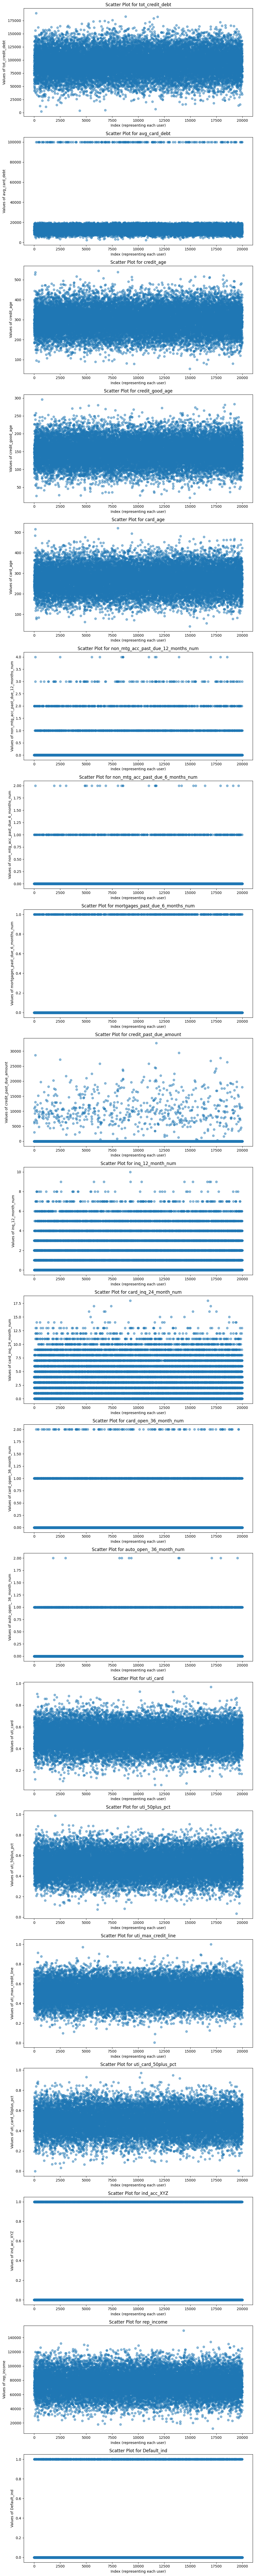

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 为数据集中的每个数值列生成一个点图
num_columns = data.select_dtypes(include=[np.number]).columns  # 选择数值类型的列
num_plots = len(num_columns)  # 计算数值列的数量
fig, axes = plt.subplots(nrows=num_plots, figsize=(10, num_plots * 5))  # 创建足够的子图

for i, col in enumerate(num_columns):
    axes[i].scatter(range(len(data)), data[col], alpha=0.5)  # 对每一列数据绘图
    axes[i].set_title(f'Scatter Plot for {col}')  # 设置每个子图的标题
    axes[i].set_xlabel('Index (representing each user)')
    axes[i].set_ylabel(f'Values of {col}')

plt.tight_layout()
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 加载数据
data = pd.read_csv("hw4data.csv")
data_encoded = pd.get_dummies(data, columns=['States'])

# 筛选没有任何数据缺失的行
complete_data = data_encoded.dropna()

# 分割数据为训练集和测试集 (80%训练, 20%测试)
train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)

# 定义特征和目标变量
# features = complete_data.columns.drop(['uti_card_50plus_pct', 'rep_income'])
features = complete_data.columns.drop(['uti_card_50plus_pct'])

# 训练uti_card_50plus_pct模型
X_train_uti = train_data[features]
y_train_uti = train_data['uti_card_50plus_pct']
model_uti = LinearRegression()
model_uti.fit(X_train_uti, y_train_uti)

# 定义测试集的特征和真实值
X_test_uti = test_data[features]
y_test_uti = test_data['uti_card_50plus_pct']

# 假设 model_uti 已经训练好，X_test_uti 和 y_test_uti 是测试集的特征和真实值
predicted_uti = model_uti.predict(X_test_uti)

# 计算MSE和R^2
mse_uti = mean_squared_error(y_test_uti, predicted_uti)
r2_uti = r2_score(y_test_uti, predicted_uti)

# 打印评估结果
print("MSE for uti_card_50plus_pct prediction:", mse_uti)
print("R^2 for uti_card_50plus_pct prediction:", r2_uti)



MSE for uti_card_50plus_pct prediction: 0.0040242873787675075
R^2 for uti_card_50plus_pct prediction: 0.7205119951152548


In [42]:
# 使用模型预测缺失的值，确保没有包含NaN值
missing_data = data_encoded[data_encoded.isnull().any(axis=1)]
missing_data_clean = missing_data.dropna(subset=features)  # 确保特征列没有NaN

missing_data_uti_pred = model_uti.predict(missing_data_clean[features])


MSE for uti_card_50plus_pct prediction: 0.0040242873787675075
R^2 for uti_card_50plus_pct prediction: 0.7205119951152548


In [ ]:
# 将预测值填充回原数据集中
data_encoded.loc[missing_data_clean.index, 'uti_card_50plus_pct'] = missing_data_uti_pred

# 打印填充后的数据，检查是否还有NaN
print(data_encoded.loc[data_encoded['uti_card_50plus_pct'].isnull() | data_encoded['rep_income'].isnull()])

In [44]:
# 将处理后的数据保存到CSV文件中
data_encoded.to_csv("card50已填充.csv", index=False)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 加载数据
data = pd.read_csv("card50已填充.csv")

# 筛选没有任何数据缺失的行
complete_data = data_encoded.dropna()

# 分割数据为训练集和测试集 (80%训练, 20%测试)
train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)

# 定义特征和目标变量
# features = complete_data.columns.drop(['uti_card_50plus_pct', 'rep_income'])
features = complete_data.columns.drop(['uti_card_50plus_pct'])

# 训练uti_card_50plus_pct模型
X_train_uti = train_data[features]
y_train_uti = train_data['uti_card_50plus_pct']
model_uti = LinearRegression()
model_uti.fit(X_train_uti, y_train_uti)

# 定义测试集的特征和真实值
X_test_uti = test_data[features]
y_test_uti = test_data['uti_card_50plus_pct']

# 假设 model_uti 已经训练好，X_test_uti 和 y_test_uti 是测试集的特征和真实值
predicted_uti = model_uti.predict(X_test_uti)

# 计算MSE和R^2
mse_uti = mean_squared_error(y_test_uti, predicted_uti)
r2_uti = r2_score(y_test_uti, predicted_uti)

# 打印评估结果
print("MSE for uti_card_50plus_pct prediction:", mse_uti)
print("R^2 for uti_card_50plus_pct prediction:", r2_uti)

